In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")



In [3]:
df=pd.read_csv("survey_results_public.csv")
df.shape

(89184, 84)

In [4]:
#vishesh_shortcuts

h=df.head(0)
def hh(*args):
    return df.head(*args)
    

In [5]:
hh(3)

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0


In [6]:
df=df[['Country','EdLevel','YearsCodePro','Employment','ConvertedCompYearly']]
df.rename({'ConvertedCompYearly':'Salary'},axis=1,inplace=True)

In [7]:
df=df[df['Salary'].notnull()]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48019 entries, 1 to 89171
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       48019 non-null  object 
 1   EdLevel       48019 non-null  object 
 2   YearsCodePro  47825 non-null  object 
 3   Employment    48007 non-null  object 
 4   Salary        48019 non-null  float64
dtypes: float64(1), object(4)
memory usage: 2.2+ MB


In [9]:
df=df.dropna()

In [10]:
df.isnull().sum()

Country         0
EdLevel         0
YearsCodePro    0
Employment      0
Salary          0
dtype: int64

In [11]:
hh(3)
df=df[df['Employment']=='Employed, full-time']
df=df.drop('Employment',axis=1)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39155 entries, 1 to 89171
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       39155 non-null  object 
 1   EdLevel       39155 non-null  object 
 2   YearsCodePro  39155 non-null  object 
 3   Salary        39155 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.5+ MB


In [13]:
df['Country'].value_counts()

Country
United States of America                                10569
Germany                                                  3201
United Kingdom of Great Britain and Northern Ireland     3072
Canada                                                   1807
India                                                    1600
                                                        ...  
Botswana                                                    1
Sierra Leone                                                1
Guyana                                                      1
Guinea-Bissau                                               1
Antigua and Barbuda                                         1
Name: count, Length: 165, dtype: int64

In [19]:
def shorten_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map

In [20]:
country_map = shorten_categories(df.Country.value_counts(), 400)
df['Country'] = df['Country'].map(country_map)
df.Country.value_counts()

Country
United States of America                                9430
Other                                                   8032
Germany                                                 3148
United Kingdom of Great Britain and Northern Ireland    3009
Canada                                                  1757
France                                                  1441
India                                                   1130
Netherlands                                              983
Australia                                                962
Spain                                                    957
Sweden                                                   849
Brazil                                                   840
Italy                                                    814
Poland                                                   684
Switzerland                                              480
Denmark                                                  425
Norway          

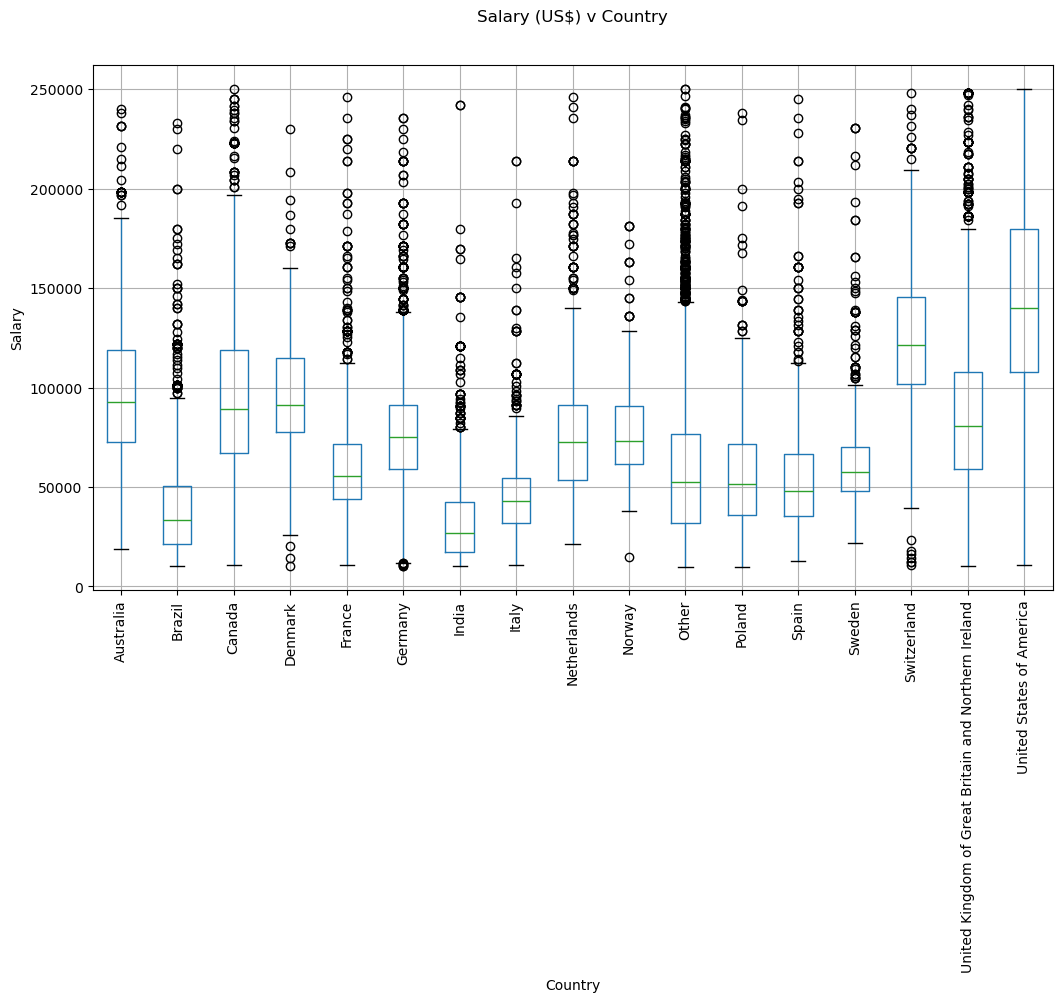

In [21]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [22]:
df=df[df['Salary']<=250000]
df=df[df['Salary']>=10000]
df=df[df['Country']!="Other"]

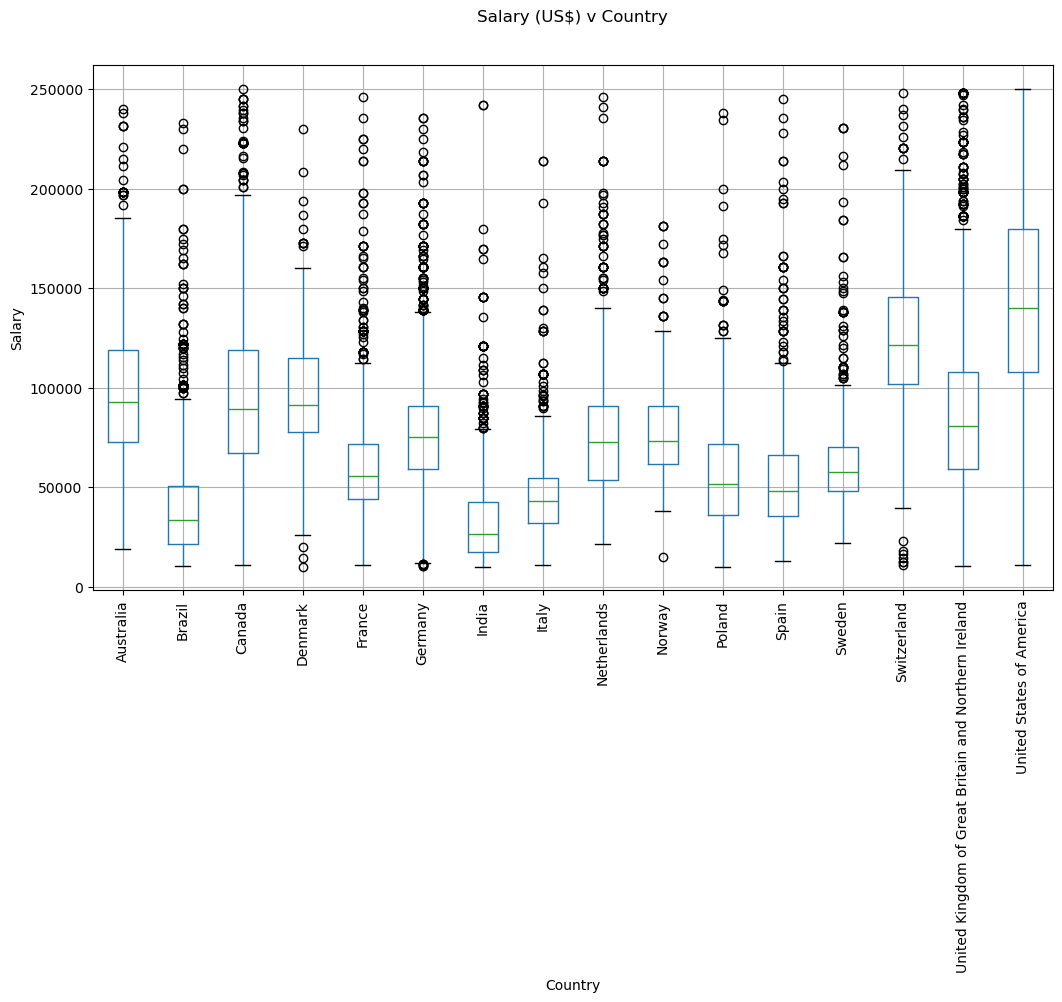

In [23]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [24]:
def clean_experience(x):
    if x ==  'More than 50 years':
        return 50
    if x == 'Less than 1 year':
        return 0.5
    return float(x)

df['YearsCodePro'] = df['YearsCodePro'].apply(clean_experience)

In [26]:
def clean_education(x):
    if 'Bachelor’s degree' in x:
        return 'Bachelor’s degree'
    if 'Master’s degree' in x:
        return 'Master’s degree'
    if 'Professional degree' in x or 'Other doctoral' in x:
        return 'Post grad'
    return 'Less than a Bachelors'

df['EdLevel'] = df['EdLevel'].apply(clean_education)

In [27]:
from sklearn.preprocessing import LabelEncoder
le_education = LabelEncoder()
df['EdLevel'] = le_education.fit_transform(df['EdLevel'])
df["EdLevel"].unique()

array([0, 1, 2])

In [28]:
le_country = LabelEncoder()
df['Country'] = le_country.fit_transform(df['Country'])
df["Country"].unique()

array([15, 14,  0,  8,  5, 12,  4, 11,  1,  7,  2, 13,  6,  9,  3, 10])

In [29]:
X = df.drop("Salary", axis=1)
y=df['Salary']

In [30]:
y.shape

(27333,)

In [31]:
X.shape

(27333, 3)

In [32]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
linear_reg.fit(X, y.values)

LinearRegression()

In [33]:

y_pred = linear_reg.predict(X)

In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
error = np.sqrt(mean_squared_error(y, y_pred))

In [35]:
error

45862.97190316814

In [36]:
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor(random_state=0)
dec_tree_reg.fit(X, y.values)

DecisionTreeRegressor(random_state=0)

In [37]:
y_pred = dec_tree_reg.predict(X)

In [38]:
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$34,113.53


In [39]:
from sklearn.ensemble import RandomForestRegressor
random_forest_reg = RandomForestRegressor(random_state=0)
random_forest_reg.fit(X, y.values)

RandomForestRegressor(random_state=0)

In [40]:
y_pred = random_forest_reg.predict(X)

In [41]:
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$34,156.73


In [42]:
from sklearn.model_selection import GridSearchCV
if X.shape[0] != y.shape[0]:
    raise ValueError("Number of samples in X and y do not match.")

max_depth = [None, 2, 4, 6, 8, 10, 12]
parameters = {"max_depth": max_depth}

regressor = DecisionTreeRegressor(random_state=0)
gs = GridSearchCV(regressor, parameters, scoring='neg_mean_squared_error')
gs.fit(X, y)  # Use y directly without .values

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [43]:
y.shape

(27333,)

In [44]:
regressor = gs.best_estimator_

regressor.fit(X, y.values)
y_pred = regressor.predict(X)
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$35,073.25


In [45]:
X

,Country,EdLevel,YearsCodePro
2,15,0,23.0
3,15,0,7.0
5,14,1,21.0
6,15,1,3.0
7,15,0,3.0
...,...,...,...
89156,15,0,8.0
89158,12,0,8.0
89162,1,2,24.0
89167,6,0,2.0


In [46]:
# country, edlevel, yearscode
X = np.array([["Sweden", 'Master’s degree', 15 ]])
X

array([['Sweden', 'Master’s degree', '15']], dtype='<U21')

In [47]:
X[:, 0] = le_country.transform(X[:,0])


In [48]:
X[:, 1] = le_education.transform(X[:,1])
# X = X.astype(float)
# X
231

231

In [49]:
X[:, 1]

array(['2'], dtype='<U21')

In [50]:
y_pred=regressor.predict(X)
y_pred

array([74281.38379531])

In [51]:
import pickle

In [52]:
data = {"model": regressor, "le_country": le_country, "le_education": le_education}
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)


In [53]:
with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)

regressor_loaded = data["model"]
le_country = data["le_country"]
le_education = data["le_education"]

In [54]:
X

array([['12', '2', '15']], dtype='<U21')